In [1]:
import pandas as pd        # for data manipulation
import seaborn as sns      # for statistical data visualisation
import numpy as np         # for linear algebra
import matplotlib.pyplot as plt  # for data visualization
from scipy import stats        # for calculating statistics
from scipy.stats import zscore
from statsmodels.graphics.mosaicplot import mosaic

# Importing various machine learning algorithm from sklearn
import sklearn.preprocessing as spp
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.decomposition as sdc
import sklearn.cluster as sclus
import sklearn.metrics as smet
import sklearn.manifold as skm
from sklearn.manifold import Isomap
import sklearn.datasets as sdat
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,roc_curve,auc,accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [2]:
sample = pd.read_csv("./data/sample_solution.csv", delimiter=",")
train_df = pd.read_csv("./data/train.csv", delimiter=",")
test_df = pd.read_csv("./data/test.csv", delimiter=",")

In [3]:
temp_cols= list(range(8, 44))
temp_df = pd.read_csv("./data/train.csv", delimiter=",", header=None, usecols= temp_cols).T

# temp_df[[0, 1, 2]] = 
# temp_df[0].str.split('_', 1, expand=True)
temp_df[[0, 1]] = temp_df[0].str.split('_', 1, expand=True)
temp_df.head()

C:\Users\batiz\anaconda3n\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,75748,75749,75750,75751,75752,75753,75754,75755,75756,75757
8,january,min_temp,36,36,36,36,36,36,36,36,...,28,28,28,28,28,28,28,26,26,27
9,january,avg_temp,50.5,50.5,50.5,50.5,50.5,50.5,50.5,50.5,...,43.451613,43.451613,43.451613,43.451613,43.451613,43.451613,43.451613,36.612903,36.612903,36.935484
10,january,max_temp,68,68,68,68,68,68,68,68,...,56,56,56,56,56,56,56,48,48,51
11,february,min_temp,35,35,35,35,35,35,35,35,...,34,34,34,34,34,34,34,30,30,29
12,february,avg_temp,50.58928571,50.58928571,50.58928571,50.58928571,50.58928571,50.58928571,50.58928571,50.58928571,...,47.672414,47.672414,47.672414,47.672414,47.672414,47.672414,47.672414,41.637931,41.637931,42.172414


In [5]:
from datetime import datetime

temp_df1 = datetime.strptime('january', '%B')
temp_df[0] =  pd.to_datetime(temp_df[0], format='%B', parse_dates = True)
temp_df = temp_df.set_index(temp_df[0])
temp_df.head(2)

# temp_df[temp_df[0]].resample('MS').mean()

def 
temp_df[1].map({'min_temp:0'})



,0,1,2,3,4,5,6,7,8,9,...,75748,75749,75750,75751,75752,75753,75754,75755,75756,75757
0,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1900-01-01,min_temp,36,36,36,36,36,36,36,36,...,28,28,28,28,28,28,28,26,26,27
1900-01-01,1900-01-01,avg_temp,50.5,50.5,50.5,50.5,50.5,50.5,50.5,50.5,...,43.451613,43.451613,43.451613,43.451613,43.451613,43.451613,43.451613,36.612903,36.612903,36.935484


ValueError: zero-size array to reduction operation fmin which has no identity

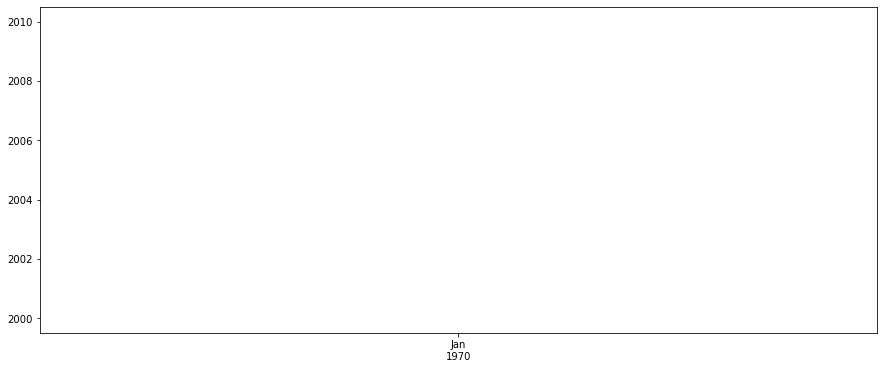

In [14]:
max_t.plot(figsize = (15, 6))
plt.show()

ValueError: Length of DataFrame vectors must match length of `data` when both are used, but `data` has length 36 and the vector passed to `x` has length 0.

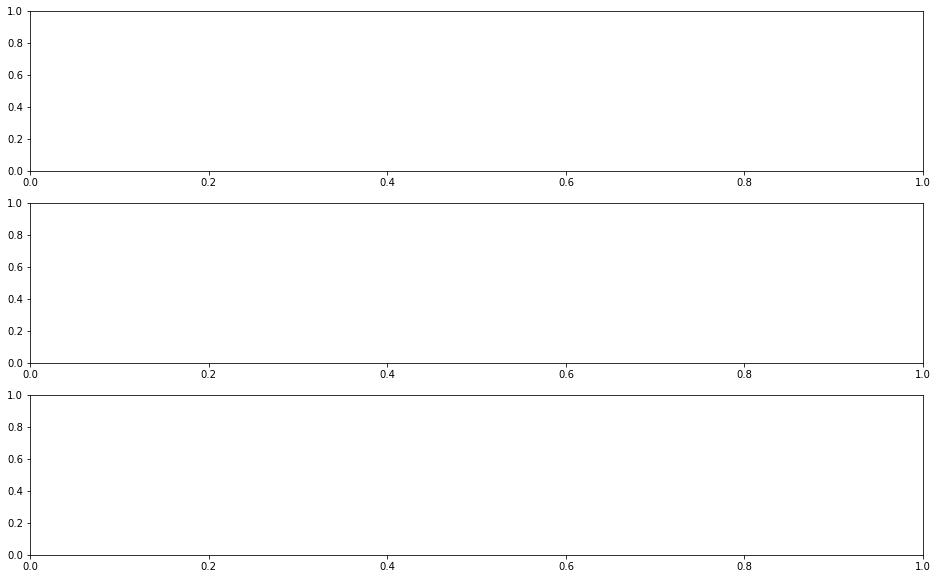

In [6]:
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=1)

sns.scatterplot(data=temp_df, x=temp_df[temp_df[0]=="max_temp"], y='max', ax=temp_df[0])
axes[0].set_title('max')
axes[0].set_xlim(temp_df[1].min(), temp_df[1].max())

# sns.scatterplot(data=temp_df, x =data[0], y='Solar', ax=axes[0])
# axes[1].set_title('Production solaire en 2016')
# axes[1].set_xlim(data.index.min(), data.index.max())

# sns.scatterplot(data=temp_df, x =data.index, y='Wind', ax=axes[2])
# axes[2].set_title('Production denergie en 2016')
# axes[2].set_xlim(data.index.min(), data.index.max())
# fig.tight_layout(pad=2)

In [55]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [40]:
train_df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [56]:
temp = train_df[['id','january_min_temp','january_avg_temp', 'january_max_temp','february_min_temp','february_avg_temp','february_max_temp','march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp','may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp','july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp','august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp']]

temp.head()


,id,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,...,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp
0,0,36,50.5,68,35,50.589286,73,40,53.693548,80,...,90,47,63.016129,83,43,53.8,72,36,49.274194,71
1,1,36,50.5,68,35,50.589286,73,40,53.693548,80,...,90,47,63.016129,83,43,53.8,72,36,49.274194,71
2,2,36,50.5,68,35,50.589286,73,40,53.693548,80,...,90,47,63.016129,83,43,53.8,72,36,49.274194,71
3,3,36,50.5,68,35,50.589286,73,40,53.693548,80,...,90,47,63.016129,83,43,53.8,72,36,49.274194,71
4,4,36,50.5,68,35,50.589286,73,40,53.693548,80,...,90,47,63.016129,83,43,53.8,72,36,49.274194,71


In [63]:
# set header as first row


# train_df.columns = train_df.iloc[0]
# train_df = train_df[1:]
# new_header = train_df.iloc[0] 
# train_df = train_df[1:]
# train_df.columns = new_header

# train_df.iloc[1:].reset_index(drop=True)

# new_first_row = temp.columns
# train_df[1:]

temp_2= pd.DataFrame(temp, header=None )


TypeError: __init__() got an unexpected keyword argument 'header'

In [ ]:
temp.reset_index(inplace=True)
temp.T

# df[['A', 'B']] = df['A'].str.split(',', 1, expand=True)

,0,1,2,3,4,5,6,7,8,9,...,75747,75748,75749,75750,75751,75752,75753,75754,75755,75756
index,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,75747.000000,75748.000000,75749.000000,75750.000000,75751.000000,75752.000000,75753.000000,75754.000000,75755.000000,75756.000000
id,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,75747.000000,75748.000000,75749.000000,75750.000000,75751.000000,75752.000000,75753.000000,75754.000000,75755.000000,75756.000000
january_min_temp,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,26.000000,26.000000,27.000000
january_avg_temp,50.500000,50.500000,50.500000,50.500000,50.500000,50.500000,50.500000,50.500000,50.500000,50.500000,...,43.451613,43.451613,43.451613,43.451613,43.451613,43.451613,43.451613,36.612903,36.612903,36.935484
january_max_temp,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,48.000000,48.000000,51.000000
february_min_temp,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,30.000000,30.000000,29.000000
february_avg_temp,50.589286,50.589286,50.589286,50.589286,50.589286,50.589286,50.589286,50.589286,50.589286,50.589286,...,47.672414,47.672414,47.672414,47.672414,47.672414,47.672414,47.672414,41.637931,41.637931,42.172414
february_max_temp,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,58.000000,58.000000,60.000000
march_min_temp,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,29.000000,29.000000,30.000000
march_avg_temp,53.693548,53.693548,53.693548,53.693548,53.693548,53.693548,53.693548,53.693548,53.693548,53.693548,...,49.354839,49.354839,49.354839,49.354839,49.354839,49.354839,49.354839,41.338710,41.338710,41.403226
